# Solutions PID Numérique

- Discrétiser un PI mixte

La fonction de transfert d'un PI mixte est la suivante:

$$ \frac{U(s)}{E(s)} = K_p \left( 1 + \frac{1}{T_i s} \right) $$

Afin de gérer l'intégrale de manière indépendante, discrétisons les actions séparemment. Le PI mixte sera alors calculé ainsi:

\begin{align}
  U_p(s) &= E(s) \\
  U_i(s) &= \frac{E(s)}{T_i s} \\
  U(s) &= K_p (U_p(s) + U_i(s))
\end{align}

La discrétisation de $U_p(s)$ donne:

$$ u_p(k) = e(k) $$

La discrétisation de $U_i(s)$ donne:

\begin{align}
  U_i(s) &= \frac{E(s)}{T_i s} \\
  T_i s U_i(s) &= E(s) \\
  T_i \frac{du_i(t)}{dt} &= e(t) \\
  T_i \frac{u_i(k) - u_i(k-1)}{h} &= e(k) \\
  u_i(k) &= \frac{h}{T_i}e(k) + u_i(k-1)
\end{align}

Le régulateur PI mixte devient alors:

\begin{align}
  u(k) &= K_p ( u_p(k) + u_i(k) ) \\
  &= K_p \left( e(k) + \frac{h}{T_i} e(k) + u_i(k-1) \right)
\end{align}

- Ecrire le pseudo code en gérant l'erreur d'intégration et l'anti-emballement

L'équation aux différences précédentes peut engendrer des erreurs d'intégrations. En développant le termine $u_i(k-1)$, l'intégrale devient:

\begin{align}
  u_i(k) &= \frac{h}{T_i}e(k) + u_i(k-1) \\
  u_i(k) &= \frac{h}{T_i}e(k) + \frac{h}{T_i}e(k-1) + u_i(k-2) \\
  u_i(k) &= \frac{h}{T_i}e(k) + \frac{h}{T_i}e(k-1) + \frac{h}{T_i}e(k-2) + u_i(k-3) \\
  \vdots \\
  u_i(k) &= \frac{h}{T_i}e(k) + \frac{h}{T_i}e(k-1) + \frac{h}{T_i}e(k-2) + \dots + \frac{h}{T_i}e(0)
\end{align}

En mettant $\frac{h}{T_i}$ en évidence, on obtient:

$$ u_i(k) = \frac{h}{T_i} ( e(k) + e(k-1) + e(k-2) + \dots + e(0) ) $$

Il est donc possible d'accumuler les erreurs dans une variable intermédiaire:

\begin{align}
  i(k) &= i(k-1) + e(k) \\
  u_i(k) &= \frac{h}{T_i} i(k)
\end{align}

Le pseudo code complet est alors:

\begin{align}
  &e(k) = sp(k) - pv(k) \\
  &i(k) = i(k-1) + e(k) \\
  &u_i(k) = \frac{h}{T_i} i(k) \\
  &u(k) = K_p (u_p(k) + u_i(k)) \\
  &\text{si}\, |u(k)| > \mu: \\
  &\quad i(k) = i(k-1) \\
  &\quad u_i(k) = \frac{h}{T_i} i(k) \\
  &\quad u(k) = K_p (u_p(k) + u_i(k))
\end{align}

- Programmer le régulateur sur Arduino

Le code se trouve dans le sketch "moteur.ino".

- Tester le régulateur

En appliquant le régulateur, on obtient le résultat suivant:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

In [9]:
t = []
pv = []

with open('./Moteur/vitesse_bf_convert.csv', 'r') as isf:
    for line in isf:
        line_list = line[:-1].split(',')
        t.append(float(line_list[0]))
        pv.append(float(line_list[2]))

sp = [200 * 5 / 1023 if t_i < 0.21 else 512 * 5 / 1023 for t_i in t]

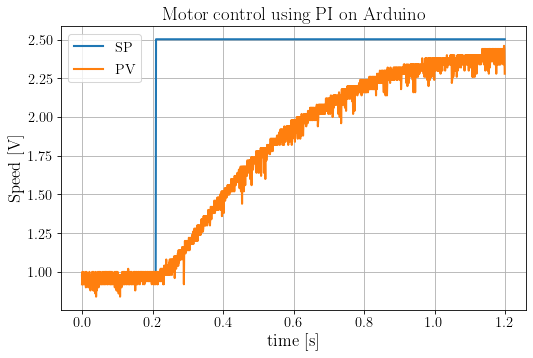

In [11]:
fig, ax = plt.subplots()
ax.plot(t, sp, label='SP')
ax.plot(t, pv, label='PV')
ax.set_title('Motor control using PI on Arduino')
ax.set_xlabel('time [s]')
ax.set_ylabel('Speed [V]')
ax.legend()
ax.grid(True, which='both')

Malheureusement, l'oscilloscope n'a pas enregistré suffisamment de points pour pouvoir visualiser correctement SP et MV.